In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("TMDB_tv_dataset_v3.csv")
df.info()

In [61]:
print(df.isnull().values.any())  #eksik deger var mı?

True


In [62]:
print(df.isnull().sum().sort_values(ascending=False)) #eksik değerler kaç tane var?

tagline                 161074
created_by              130225
homepage                115768
production_companies    107630
production_countries     89679
backdrop_path            89285
overview                 73834
networks                 69546
genres                   67628
poster_path              59099
spoken_languages         58174
languages                57415
first_air_date           31478
origin_country           31025
last_air_date            29646
name                         5
original_name                5
status                       0
id                           0
type                         0
popularity                   0
in_production                0
adult                        0
vote_average                 0
vote_count                   0
original_language            0
number_of_episodes           0
number_of_seasons            0
episode_run_time             0
dtype: int64


In [63]:
df["tagline"] = df["tagline"].fillna("tagline")
df["created_by"] = df["created_by"].fillna("created_by")
df["homepage"] = df["homepage"].fillna("homepage")
df["production_companies"] = df["production_companies"].fillna("production_companies")
df["production_countries"] = df["production_countries"].fillna("production_countries")
df["poster_path"] = df["poster_path"].fillna("poster_path")
df["name"] = df["name"].fillna("name")
df["original_name"] = df["original_name"].fillna("original_name")
df["backdrop_path"] = df["backdrop_path"].fillna("backdrop_path")
df["overview"] = df["overview"].fillna("overview")
df["poster_path"] = df["poster_path"].fillna("poster_path")
df["backdrop_path"] = df["backdrop_path"].fillna("backdrop_path")
df["languages"] = df["languages"].fillna("languages")
df["first_air_date"] = df["first_air_date"].fillna(1)
df["last_air_date"] = df["last_air_date"].fillna(1)
df["episode_run_time"] = df["episode_run_time"].fillna(1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166383 entries, 0 to 166382
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    166383 non-null  int64  
 1   name                  166383 non-null  object 
 2   number_of_seasons     166383 non-null  int64  
 3   number_of_episodes    166383 non-null  int64  
 4   original_language     166383 non-null  object 
 5   vote_count            166383 non-null  int64  
 6   vote_average          166383 non-null  float64
 7   overview              166383 non-null  object 
 8   adult                 166383 non-null  bool   
 9   backdrop_path         166383 non-null  object 
 10  first_air_date        166383 non-null  object 
 11  last_air_date         166383 non-null  object 
 12  homepage              166383 non-null  object 
 13  in_production         166383 non-null  bool   
 14  original_name         166383 non-null  object 
 15  

In [66]:
print(df.isnull().sum().sort_values(ascending=False)) #eksik değerler kaç tane var?

networks                69546
genres                  67628
spoken_languages        58174
origin_country          31025
id                          0
popularity                  0
production_countries        0
production_companies        0
languages                   0
created_by                  0
tagline                     0
status                      0
type                        0
poster_path                 0
original_name               0
name                        0
in_production               0
homepage                    0
last_air_date               0
first_air_date              0
backdrop_path               0
adult                       0
overview                    0
vote_average                0
vote_count                  0
original_language           0
number_of_episodes          0
number_of_seasons           0
episode_run_time            0
dtype: int64


In [67]:
df=df[(df.number_of_seasons>0) & (df.number_of_episodes>0) & (df.episode_run_time>4) ]   #aykırı değerleri sildik
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73747 entries, 1 to 166363
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    73747 non-null  int64  
 1   name                  73747 non-null  object 
 2   number_of_seasons     73747 non-null  int64  
 3   number_of_episodes    73747 non-null  int64  
 4   original_language     73747 non-null  object 
 5   vote_count            73747 non-null  int64  
 6   vote_average          73747 non-null  float64
 7   overview              73747 non-null  object 
 8   adult                 73747 non-null  bool   
 9   backdrop_path         73747 non-null  object 
 10  first_air_date        73747 non-null  object 
 11  last_air_date         73747 non-null  object 
 12  homepage              73747 non-null  object 
 13  in_production         73747 non-null  bool   
 14  original_name         73747 non-null  object 
 15  popularity            7

In [68]:
#En popüler Sovlar

In [69]:
en_populer=df.sort_values("popularity",ascending=False).head(20)   #false=azalan sıralama;popüler filmleri belirledik

In [70]:
en_populer.popularity

1771      3707.008
2283      3049.228
3591      2898.984
4591      2747.685
4684      2593.643
1600      2419.997
7318      2232.167
4297      2207.068
904       2016.781
14594     1968.201
157200    1869.253
3309      1837.590
29203     1758.659
2533      1753.537
9224      1725.319
13        1647.218
5177      1646.037
20279     1576.642
4609      1545.909
6421      1492.788
Name: popularity, dtype: float64

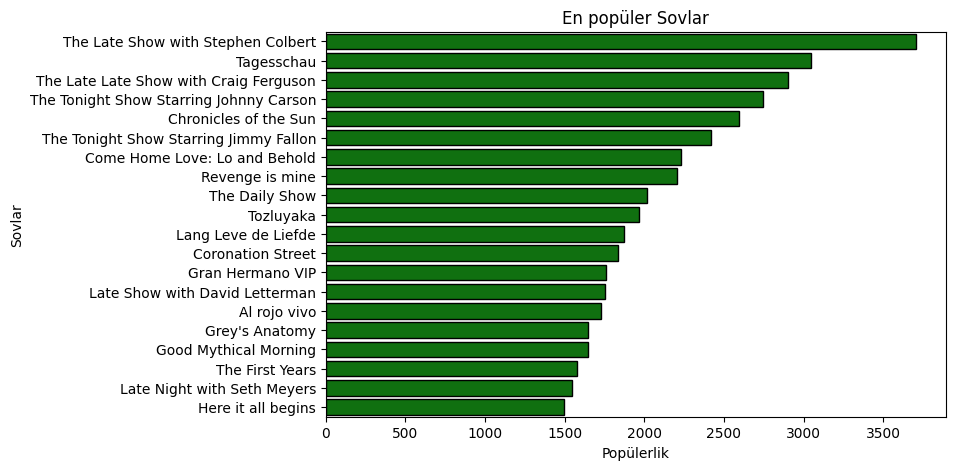

In [84]:
plt.figure(figsize=(8,5)) #büyüklük
sns.barplot(x=en_populer.popularity, y=en_populer.name,color="green",edgecolor="black") #x ve y eksenine hangi veriler gelecek
plt.xticks(rotation= 0)   #yazının derecesi 45 çapraz 90 dik
plt.xlabel('Popülerlik')
plt.ylabel('Sovlar')
plt.title('En popüler Sovlar')
plt.show()

In [72]:
#En populer 20 sovun kaç sezon oldugu

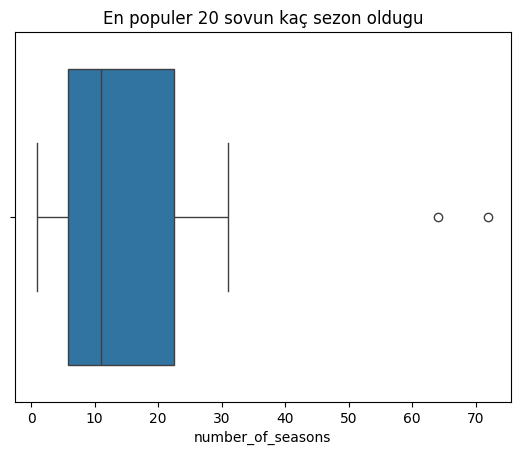

In [76]:
sns.boxplot(x=en_populer.number_of_seasons); #En iyi 20 şovun sezon sayilari
plt.title('En populer 20 sovun kaç sezon oldugu');

In [74]:
#En çok kullanılan orijinal diller

In [85]:
original_lang = df.original_language.value_counts().head(10) 

In [86]:
original_lang={'language':original_lang.index , 'count':original_lang.values}

In [87]:
pd.DataFrame(original_lang)

,language,count
0,en,31288
1,ja,7934
2,zh,5340
3,ko,4081
4,fr,3732
5,es,2745
6,de,2590
7,nl,1880
8,pt,1457
9,tr,1158


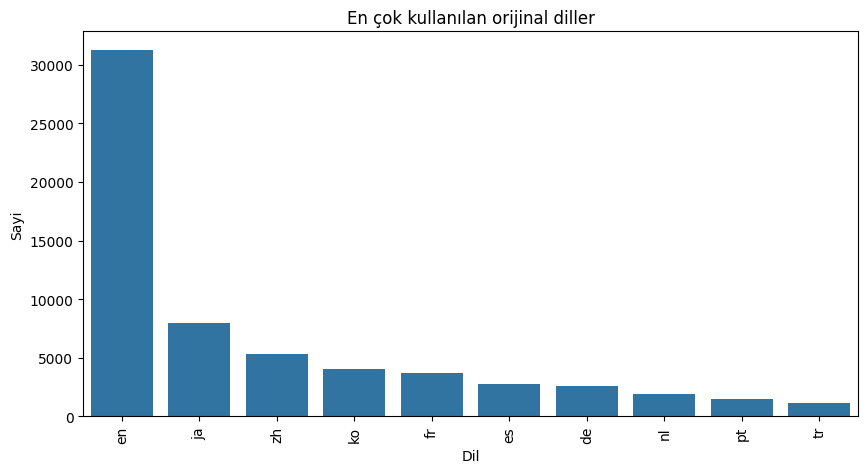

In [88]:
plt.figure(figsize=(10,5)) #büyüklük
sns.barplot(x=original_lang["language"], y=original_lang["count"]) #x ve y eksenine hangi veriler gelecek
plt.xticks(rotation= 90)   #yazının derecesi 45 çapraz 90 dik
plt.xlabel('Dil')
plt.ylabel('Sayi')
plt.title('En çok kullanılan orijinal diller')
plt.show()

In [89]:
#En çok üretilen türler.

In [28]:
pop_genres=df.genres.value_counts().head(6)   #false=azalan sıralama;popüler filmleri belirledik

In [29]:
pop_genres={'Genres':pop_genres.index , 'count':pop_genres.values}

In [30]:
pd.DataFrame(pop_genres)

,Genres,count
0,Drama,9805
1,Documentary,8524
2,Comedy,6538
3,Reality,4680
4,Animation,1925
5,"Comedy, Drama",1402


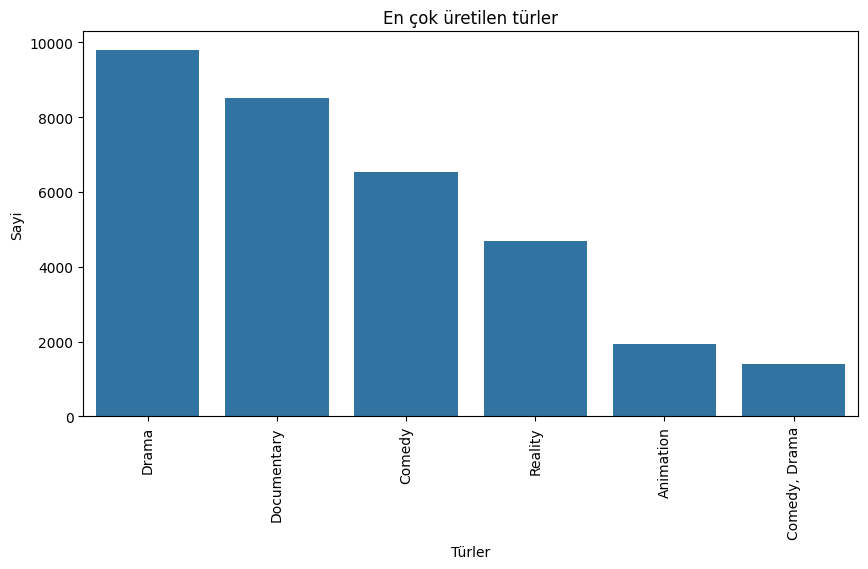

In [31]:
plt.figure(figsize=(10,5)) #büyüklük
sns.barplot(x=pop_genres["Genres"], y=pop_genres["count"]) #x ve y eksenine hangi veriler gelecek
plt.xticks(rotation= 90)   #yazının derecesi 45 çapraz 90 dik
plt.xlabel('Türler')
plt.ylabel('Sayi')
plt.title('En çok üretilen türler')
plt.show()

In [32]:
#en cok üreten platform

In [90]:
netw=df.networks.value_counts().head(10)   #false=azalan sıralama;popüler filmleri belirledik

In [91]:
netw={'Network':netw.index , 'count':netw.values}

In [92]:
pd.DataFrame(netw)

,Network,count
0,BBC One,1663
1,NBC,1332
2,ITV1,1271
3,BBC Two,1243
4,Netflix,1214
5,ABC,1199
6,CBS,1091
7,Channel 4,876
8,YouTube,810
9,TVB Jade,713


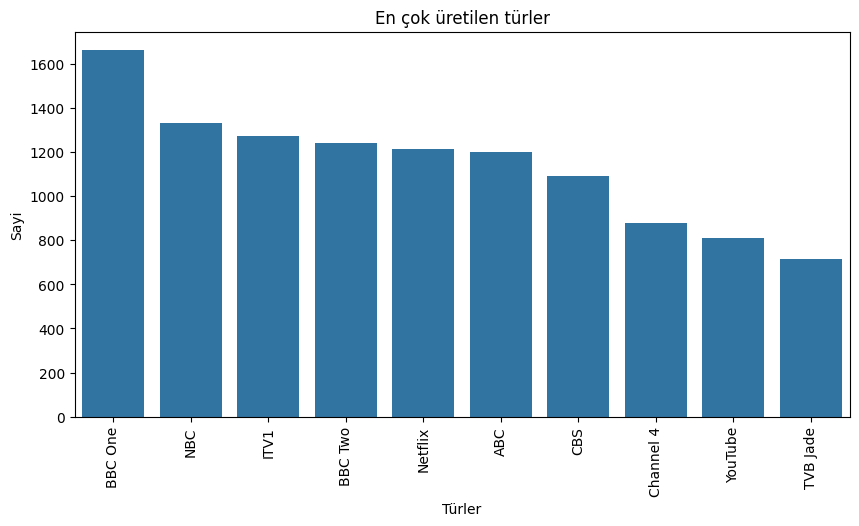

In [93]:
plt.figure(figsize=(10,5)) #büyüklük
sns.barplot(x=netw["Network"], y=netw["count"]) #x ve y eksenine hangi veriler gelecek
plt.xticks(rotation= 90)   #yazının derecesi 45 çapraz 90 dik
plt.xlabel('Türler')
plt.ylabel('Sayi')
plt.title('En çok üretilen türler')
plt.show()